In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amitsavant/covid19-india-statewise-reported-cases-timeseries")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/covid19-india-statewise-reported-cases-timeseries


In [2]:
import pandas as pd
import os


file_list = os.listdir(path)


csv_file = None
for file_name in file_list:
    if file_name.endswith('.csv'):
        csv_file = os.path.join(path, file_name)
        break

if csv_file:
    df = pd.read_csv(csv_file)
    display(df.head())
else:
    print("No CSV file found in the downloaded directory.")

,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death
0,30-01-2020,Kerala,1,NaN,NaN
1,02-02-2020,Kerala,2,NaN,NaN
2,03-02-2020,Kerala,3,NaN,NaN
3,02-03-2020,Kerala,3,NaN,NaN
4,02-03-2020,Delhi,1,NaN,NaN


In [3]:
df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9067 entries, 0 to 9066
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       9067 non-null   object 
 1   State                      9067 non-null   object 
 2   Total Confirmed Cases      9067 non-null   int64  
 3   Cured/Discharged/Migrated  8722 non-null   float64
 4   Death                      8722 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 354.3+ KB


,0
Date,0
State,0
Total Confirmed Cases,0
Cured/Discharged/Migrated,345
Death,345


In [4]:
# First, ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by state and date to ensure correct cumulative calculation
df = df.sort_values(by=['State', 'Date'])

# Group by state and calculate the cumulative sum for cases, recoveries, and deaths
df['Total_Confirmed'] = df.groupby('State')['Total Confirmed Cases'].cumsum()
df['Total_Recovered'] = df.groupby('State')['Cured/Discharged/Migrated'].cumsum()
df['Total_Deaths'] = df.groupby('State')['Death'].cumsum()

# Display the new columns for a specific state to verify
display(df[df['State'] == 'Delhi'].head(10))

/tmp/ipython-input-86794987.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,State,Total Confirmed Cases,Cured/Discharged/Migrated,Death,Total_Confirmed,Total_Recovered,Total_Deaths
4,2020-03-02,Delhi,1,NaN,NaN,1,NaN,NaN
7,2020-03-03,Delhi,1,NaN,NaN,2,NaN,NaN
14,2020-03-04,Delhi,1,NaN,NaN,3,NaN,NaN
20,2020-03-05,Delhi,3,NaN,NaN,6,NaN,NaN
26,2020-03-06,Delhi,4,NaN,NaN,10,NaN,NaN
32,2020-03-07,Delhi,4,NaN,NaN,14,NaN,NaN
42,2020-03-08,Delhi,4,NaN,NaN,18,NaN,NaN
52,2020-03-09,Delhi,5,NaN,NaN,23,NaN,NaN
64,2020-03-10,Delhi,5,NaN,NaN,28,NaN,NaN
78,2020-03-11,Delhi,6,NaN,NaN,34,NaN,NaN


In [5]:
# --- 3. Pivot the Data ---
# Create a separate pivot table for each metric
confirmed_df = df.pivot_table(index='Date', columns='State', values='Total_Confirmed').fillna(0)
recovered_df = df.pivot_table(index='Date', columns='State', values='Total_Recovered').fillna(0)
deaths_df = df.pivot_table(index='Date', columns='State', values='Total_Deaths').fillna(0)

# Display the head of the new 'confirmed' DataFrame to see the structure
print("Pivoted Confirmed Cases DataFrame:")
display(confirmed_df.head())

Pivoted Confirmed Cases DataFrame:


State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [6]:
import numpy as np

# Get the list of states from our pivoted DataFrame's columns
states = confirmed_df.columns
num_states = len(states)

# Create a mapping from state name to an index (0 to N-1)
state_to_idx = {state: i for i, state in enumerate(states)}

# Adjacency list for Indian States and UTs based on shared borders
# (Note: Some UTs like Andaman & Nicobar have no land borders with others)
adjacency_list = {
    'Andaman and Nicobar Islands': [], 'Andhra Pradesh': ['Tamil Nadu', 'Karnataka', 'Telangana', 'Chhattisgarh', 'Odisha'],
    'Arunachal Pradesh': ['Assam', 'Nagaland'], 'Assam': ['Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'West Bengal'],
    'Bihar': ['Uttar Pradesh', 'Jharkhand', 'West Bengal'], 'Chandigarh': ['Punjab', 'Haryana'],
    'Chhattisgarh': ['Madhya Pradesh', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Odisha', 'Jharkhand', 'Uttar Pradesh'],
    'Dadra and Nagar Haveli and Daman and Diu': ['Gujarat', 'Maharashtra'], 'Delhi': ['Haryana', 'Uttar Pradesh'],
    'Goa': ['Maharashtra', 'Karnataka'], 'Gujarat': ['Rajasthan', 'Madhya Pradesh', 'Maharashtra', 'Dadra and Nagar Haveli and Daman and Diu'],
    'Haryana': ['Punjab', 'Himachal Pradesh', 'Rajasthan', 'Uttar Pradesh', 'Delhi', 'Chandigarh'],
    'Himachal Pradesh': ['Jammu and Kashmir', 'Ladakh', 'Punjab', 'Haryana', 'Uttarakhand', 'Uttar Pradesh'],
    'Jammu and Kashmir': ['Ladakh', 'Himachal Pradesh', 'Punjab'], 'Jharkhand': ['Bihar', 'Uttar Pradesh', 'Chhattisgarh', 'Odisha', 'West Bengal'],
    'Karnataka': ['Goa', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Tamil Nadu', 'Kerala'],
    'Kerala': ['Karnataka', 'Tamil Nadu'], 'Ladakh': ['Jammu and Kashmir', 'Himachal Pradesh'],
    'Lakshadweep': [], 'Madhya Pradesh': ['Gujarat', 'Rajasthan', 'Uttar Pradesh', 'Chhattisgarh', 'Maharashtra'],
    'Maharashtra': ['Gujarat', 'Madhya Pradesh', 'Chhattisgarh', 'Telangana', 'Karnataka', 'Goa', 'Dadra and Nagar Haveli and Daman and Diu'],
    'Manipur': ['Nagaland', 'Assam', 'Mizoram'], 'Meghalaya': ['Assam'], 'Mizoram': ['Manipur', 'Assam', 'Tripura'],
    'Nagaland': ['Arunachal Pradesh', 'Manipur', 'Assam'], 'Odisha': ['Chhattisgarh', 'Andhra Pradesh', 'Jharkhand', 'West Bengal', 'Telangana'],
    'Puducherry': ['Tamil Nadu', 'Kerala', 'Andhra Pradesh'], 'Punjab': ['Jammu and Kashmir', 'Himachal Pradesh', 'Haryana', 'Rajasthan', 'Chandigarh'],
    'Rajasthan': ['Punjab', 'Haryana', 'Uttar Pradesh', 'Madhya Pradesh', 'Gujarat'],
    'Sikkim': ['West Bengal'], 'Tamil Nadu': ['Kerala', 'Karnataka', 'Andhra Pradesh', 'Puducherry'],
    'Telangana': ['Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Chhattisgarh', 'Odisha'],
    'Tripura': ['Assam', 'Mizoram'], 'Uttar Pradesh': ['Uttarakhand', 'Himachal Pradesh', 'Haryana', 'Delhi', 'Rajasthan', 'Madhya Pradesh', 'Chhattisgarh', 'Jharkhand', 'Bihar'],
    'Uttarakhand': ['Himachal Pradesh', 'Uttar Pradesh'], 'West Bengal': ['Odisha', 'Jharkhand', 'Bihar', 'Sikkim', 'Assam']
}


# Initialize an NxN matrix of zeros, where N is the number of states
adj_matrix = np.zeros((num_states, num_states))

# Populate the matrix based on the adjacency list
for state, neighbors in adjacency_list.items():
    if state in state_to_idx:
        state_idx = state_to_idx[state]
        for neighbor in neighbors:
            if neighbor in state_to_idx:
                neighbor_idx = state_to_idx[neighbor]
                adj_matrix[state_idx, neighbor_idx] = 1
                adj_matrix[neighbor_idx, state_idx] = 1 # The graph is undirected

# Let's display a small slice of the matrix to verify
print("Adjacency Matrix (slice):")
print(adj_matrix[:5, :5])

# Also, let's check the neighbors of Delhi as an example
delhi_idx = state_to_idx['Delhi']
delhi_neighbors_indices = np.where(adj_matrix[delhi_idx] == 1)[0]
delhi_neighbors_names = [states[i] for i in delhi_neighbors_indices]
print(f"\nNeighbors of Delhi: {delhi_neighbors_names}")

Adjacency Matrix (slice):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]

Neighbors of Delhi: ['Haryana', 'Uttar Pradesh']


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import TensorDataset, DataLoader



In [11]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00


In [8]:
# --- 2. Pivot and Log Transform ---
confirmed_df = df.pivot_table(index='Date', columns='State', values='Total Confirmed Cases').fillna(0)
full_data = confirmed_df.to_numpy()
log_data = np.log1p(full_data)

In [9]:
# --- 3. Scale and Sequence Data ---
train_size = int(0.8 * len(log_data))
train_data, test_data = log_data[:train_size], log_data[train_size:]

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

lookback_window = 14
forecast_horizon = 7

def create_sequences(data, lookback, horizon):
    X, y = [], []
    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i : i + lookback])
        y.append(data[i + lookback : i + lookback + horizon])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled, lookback_window, forecast_horizon)
X_test, y_test = create_sequences(test_data_scaled, lookback_window, forecast_horizon)

# --- 4. Convert to PyTorch Tensors and DataLoaders ---
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

print("Data preparation complete.")
print(f"Training sequences shape: {X_train_tensor.shape}")
print(f"Testing sequences shape: {X_test_tensor.shape}")

Data preparation complete.
Training sequences shape: torch.Size([205, 14, 35])
Testing sequences shape: torch.Size([37, 14, 35])


In [12]:
import torch.nn as nn
from torch_geometric.utils import to_edge_index
from torch_geometric.nn import GCNConv

# Convert the adjacency matrix to edge_index format
edge_index = to_edge_index(torch.tensor(adj_matrix, dtype=torch.float32).to_sparse())[0]

class SpatioTemporalGNN_v2(nn.Module):
    def __init__(self, num_nodes, lookback_window, forecast_horizon):
        super(SpatioTemporalGNN_v2, self).__init__()
        self.num_nodes = num_nodes
        self.lookback_window = lookback_window
        self.forecast_horizon = forecast_horizon

        self.gcn = GCNConv(1, 64)
        self.dropout1 = nn.Dropout(0.3)
        self.lstm = nn.LSTM(input_size=64 * num_nodes, hidden_size=256, num_layers=2, batch_first=True)
        self.dropout2 = nn.Dropout(0.3)
        self.linear = nn.Linear(256, num_nodes * forecast_horizon)

    def forward(self, x, edge_index):
        gcn_outputs = []
        for t in range(self.lookback_window):
            snapshot = x[:, t, :].unsqueeze(-1)
            batch_gcn_out = [torch.relu(self.gcn(snapshot[i], edge_index)) for i in range(x.size(0))]
            gcn_out_batch_tensor = torch.stack(batch_gcn_out)
            gcn_outputs.append(gcn_out_batch_tensor)

        gcn_sequence = torch.stack(gcn_outputs, dim=1)
        gcn_sequence = self.dropout1(gcn_sequence)

        lstm_input = gcn_sequence.view(x.size(0), self.lookback_window, -1)
        lstm_out, _ = self.lstm(lstm_input)

        last_time_step_out = lstm_out[:, -1, :]
        last_time_step_out = self.dropout2(last_time_step_out)

        output = self.linear(last_time_step_out)
        output = output.view(-1, self.forecast_horizon, self.num_nodes)

        return output

print("Model V2 defined.")

Model V2 defined.


Starting model training...
Epoch [10/80], Loss: 0.008959
Epoch [20/80], Loss: 0.005513
Epoch [30/80], Loss: 0.004916
Epoch [40/80], Loss: 0.004383
Epoch [50/80], Loss: 0.003370
Epoch [60/80], Loss: 0.003316
Epoch [70/80], Loss: 0.002760
Epoch [80/80], Loss: 0.002671
Finished Training!


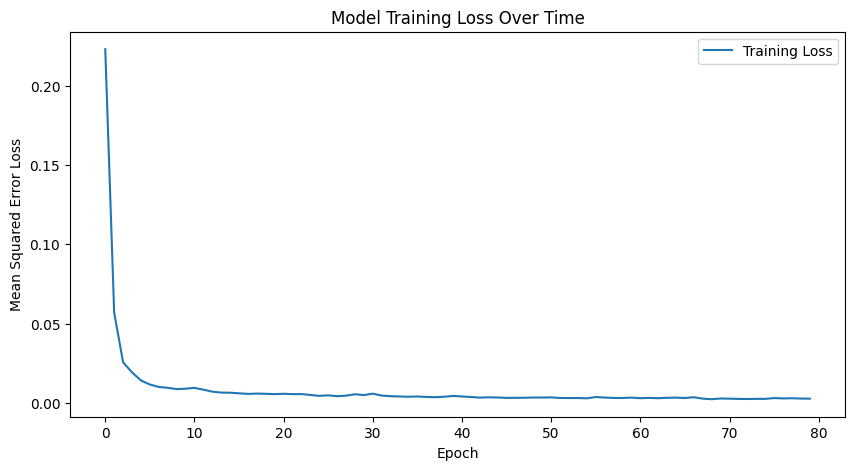

In [13]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Instantiate the model
model_v2 = SpatioTemporalGNN_v2(
    num_nodes=num_states,
    lookback_window=lookback_window,
    forecast_horizon=forecast_horizon
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_v2.parameters(), lr=0.001)

# Training Loop
epochs = 80
train_losses = []
print("Starting model training...")
for epoch in range(epochs):
    model_v2.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model_v2(inputs, edge_index)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.6f}')
print("Finished Training!")

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Model Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_v2.eval()
predictions, actuals = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_v2(inputs, edge_index)

        # Inverse transform both predictions and actuals
        outputs_unscaled = scaler.inverse_transform(outputs.numpy().reshape(-1, num_states))
        labels_unscaled = scaler.inverse_transform(labels.numpy().reshape(-1, num_states))

        outputs_orig_scale = np.expm1(outputs_unscaled)
        labels_orig_scale = np.expm1(labels_unscaled)

        predictions.append(outputs_orig_scale)
        actuals.append(labels_orig_scale)

# Reshape and concatenate all batch results
predictions = np.concatenate(predictions).reshape(-1, forecast_horizon, num_states)
actuals = np.concatenate(actuals).reshape(-1, forecast_horizon, num_states)

predictions[predictions < 0] = 0

mae_final = mean_absolute_error(actuals.flatten(), predictions.flatten())
rmse_final = np.sqrt(mean_squared_error(actuals.flatten(), predictions.flatten()))

print("\n--- Final Evaluation Results ---")
print(f"Test Set Mean Absolute Error (MAE): {mae_final:.2f} cases")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse_final:.2f} cases")


--- Final Evaluation Results ---
Test Set Mean Absolute Error (MAE): 53488.57 cases
Test Set Root Mean Squared Error (RMSE): 102081.93 cases


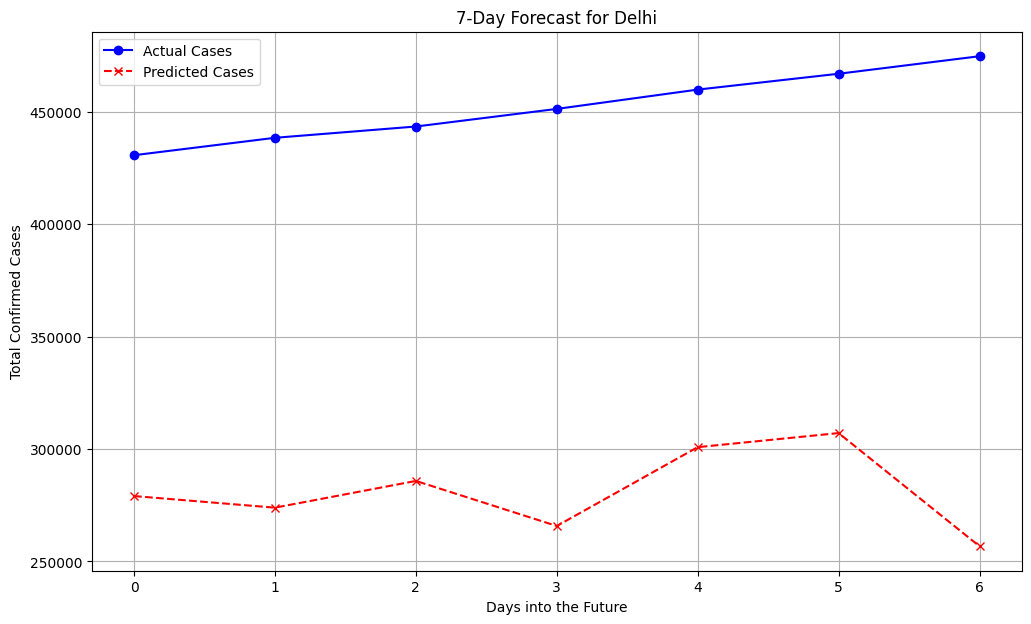

In [15]:
# Choose a sample from the test set to visualize
sample_idx = 15
input_sample = X_test_tensor[sample_idx].unsqueeze(0)
actual_forecast_sample = actuals[sample_idx]

# Get the model's prediction
model_v2.eval()
with torch.no_grad():
    output_sample_scaled = model_v2(input_sample, edge_index)

# Inverse transform the single prediction
output_unscaled = scaler.inverse_transform(output_sample_scaled.numpy().reshape(-1, num_states))
predicted_forecast_sample = np.expm1(output_unscaled).reshape(forecast_horizon, num_states)
predicted_forecast_sample[predicted_forecast_sample < 0] = 0

# Get the index for a state to plot, e.g., 'Delhi'
state_name = 'Delhi'
state_idx = state_to_idx[state_name]

# Get the actual and predicted values for that state
actual_plot_data = actual_forecast_sample[:, state_idx]
predicted_plot_data = predicted_forecast_sample[:, state_idx]

# Plot the results
plt.figure(figsize=(12, 7))
plt.plot(range(forecast_horizon), actual_plot_data, label='Actual Cases', marker='o', color='blue')
plt.plot(range(forecast_horizon), predicted_plot_data, label='Predicted Cases', marker='x', linestyle='--', color='red')
plt.title(f'7-Day Forecast for {state_name}')
plt.xlabel('Days into the Future')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import joblib

# 1. Save the trained model's weights
torch.save(model_v2.state_dict(), 'gnn_lstm_model_v2.pth')

# 2. Save the scaler object
joblib.dump(scaler, 'min_max_scaler.gz')

# 3. Save other necessary variables
other_params = {
    'num_states': num_states,
    'lookback_window': lookback_window,
    'forecast_horizon': forecast_horizon,
    'edge_index': edge_index,
    'state_to_idx': state_to_idx,
    # We save the test tensor to use as the RL starting point
    'X_test_tensor': X_test_tensor
}
torch.save(other_params, 'other_params.pth')

print("All necessary files have been saved successfully!")
print("Please download: gnn_lstm_model_v2.pth, min_max_scaler.gz, and other_params.pth")

All necessary files have been saved successfully!
Please download: gnn_lstm_model_v2.pth, min_max_scaler.gz, and other_params.pth
